# Data Import and Cleaning

In [2]:
import pandas as pd
import numpy as np

In [3]:
# assigning csv file to pandas for it to unpack
df = pd.read_csv('churn.csv')

In [4]:
# printing the first 5 entries
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#  use .columns to print the columns of the dataset
print(df.columns)
# taking the exited as the y value for our prediction (depending on other factors presented in the dataset)
print(df['Exited'])
# getting the shape of the dataset
print(df.shape)
#printing numerical statistics about columns of the dataset
print(df.describe())

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64
(10000, 14)
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     

In [6]:
# data cleaning
# do not need the row number, customer id, or surname (unnecessary columns)
# non-static function so resulting dataframe needs to be reassigned
df = df.drop(['RowNumber', 'CustomerId','Surname'],axis=1)


In [7]:
# updated dataframe with dropped columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# checking for null values in our dataset (would have to remove if we did find null values)
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# prints the data types for each column
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# gives us all the unique values from the column
print(df['Gender'].unique())
print(df['Geography'].unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


In [11]:
# printing the number of duplicates in our dataframe
print(df.duplicated().sum())

0


In [12]:
# renaming columns (in dictionary form)
df = df.rename(columns = {'Exited':'Churn'})
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')


# Data Visualization

In [13]:
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Churn Percentage

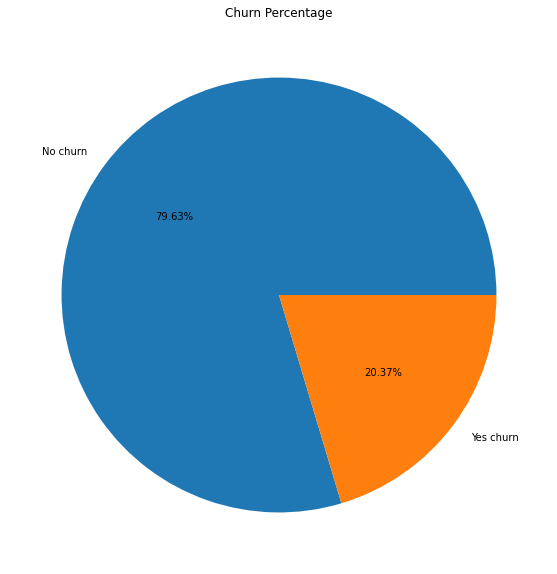

In [14]:
# pie chart for churn percentages
plt.figure(figsize=(10,10), facecolor="White") # build space to host graph
plt.pie(df['Churn'].value_counts(), labels=['No churn','Yes churn'], autopct='%1.2f%%') # getting frequencies of churn and no churns to show a frequency of churning customers
plt.title('Churn Percentage')
plt.show()

## Gender vs. Churn Count Plots

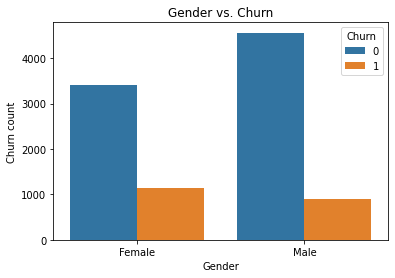

In [15]:
# view relationship between gender and churn prediction
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Churn count')
plt.show()

## Age Histogram Plots

Text(0.5, 1.0, 'Age vs. Churn')

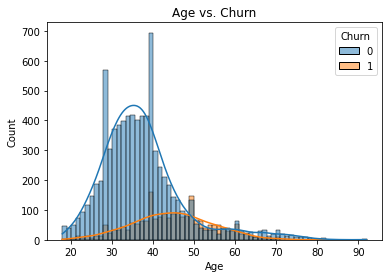

In [16]:
# view age distribution
sns.histplot(data = df, x = 'Age', hue = 'Churn', kde=True)
plt.title('Age vs. Churn')

## Credit Score vs. Churn Box and Violin Plots

<Axes: xlabel='Churn', ylabel='CreditScore'>

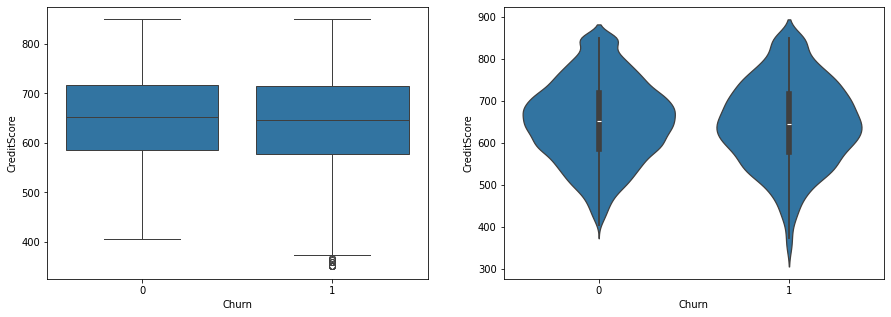

In [17]:
# view credit scores in box plots and violin plots
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Churn',y='CreditScore',data=df,ax=ax[0])
sns.violinplot(x='Churn',y='CreditScore',data=df,ax=ax[1])

## Location vs. Churn Count Plot

Text(0, 0.5, 'Churn count')

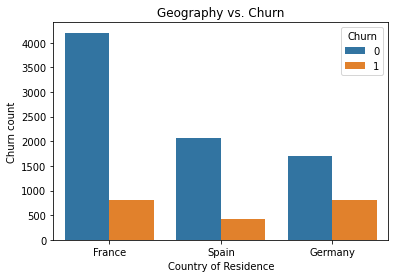

In [18]:
# customer location vs churn data
sns.countplot(x = 'Geography', hue = 'Churn', data = df)
plt.title('Geography vs. Churn')
plt.xlabel('Country of Residence')
plt.ylabel('Churn count')

## Tenure vs. Churn Graph

<Axes: xlabel='Tenure', ylabel='count'>

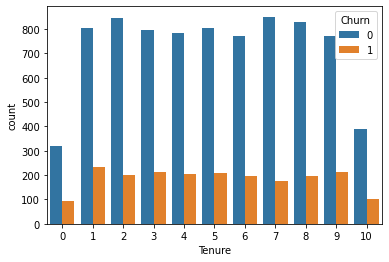

In [19]:
sns.countplot(x='Tenure', hue='Churn', data=df) # from graph, does not look significant enough to show an impact on churn rates

<Axes: xlabel='Balance', ylabel='Count'>

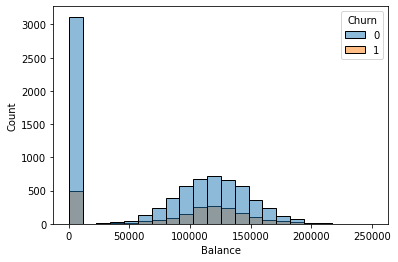

In [22]:
sns.histplot(data=df,x='Balance',hue='Churn')
# histogram looks very centered except the 0 balance people

In [23]:
# looking for errors in data (people have salaries but no balance in their bank accounts)
df[df['Balance'] == 0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [24]:
df['NumOfProducts'].unique()
# seeing if we have less enough unique values to get a countplot

array([1, 3, 2, 4])

<Axes: xlabel='NumOfProducts', ylabel='count'>

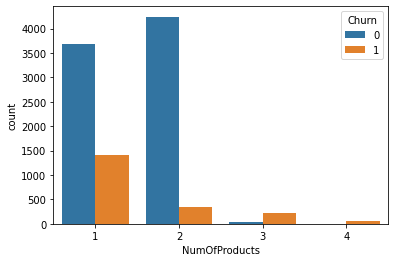

In [25]:
sns.countplot(x='NumOfProducts',hue='Churn',data=df)
# most people have 1-2 products but there are significantly less people with 3-4 products that churn
# therefore people with lower number of products are more likely to churn

In [27]:
df = df.rename(columns={'NumOfProducts': 'NumAccounts'})

In [28]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumAccounts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

In [30]:
df['HasCrCard'].unique()

array([1, 0])

<Axes: xlabel='HasCrCard', ylabel='count'>

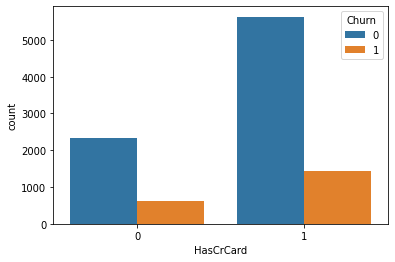

In [31]:
sns.countplot(data=df,x='HasCrCard',hue='Churn')
# you are more likely to churn if you have a credit card

In [32]:
df['IsActiveMember'].unique()

array([1, 0])

<Axes: xlabel='IsActiveMember', ylabel='count'>

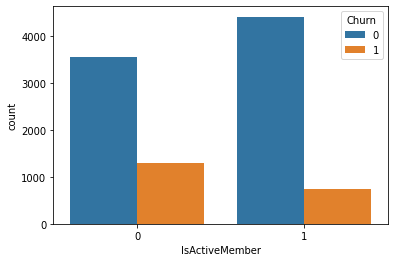

In [33]:
sns.countplot(data=df,x='IsActiveMember',hue='Churn')
# you are more likely to churn if you are an active member